# Excercise 6: MFKZIZ004


## The fixed eulerian method

In [3]:
import pylab as pl
# This was taken from the IOM notes amd modified so that it works in this python notebook. 

# Parameters
t0 = 0.0       # Initial time
tn = 20.0      # Final time
dt = 10.0      # Time step (will change later)
kappa = 0.05   # Decay constant
C0 = 0.5       # Initial concentration (mg chl/m^3)

# Decay function (Euler-Forward)
def F(k, C):
    return -k * C

def euler_forward(t0, tn, dt, kappa, C0):
    Ntot = int(pl.floor((tn - t0) / dt) + 1)
    C = pl.zeros(Ntot)
    t = pl.zeros(Ntot)
    C[0] = C0
    t[0] = t0

    for n in range(Ntot - 1):
        C[n + 1] = C[n] + F(kappa, C[n]) * dt
        t[n + 1] = t[n] + dt

    return t, C


In [5]:
# the backward one: 
def euler_backward(t0, tn, dt, kappa, C0):
    Ntot = int(pl.floor((tn - t0) / dt) + 1)
    C = pl.zeros(Ntot)
    t = pl.zeros(Ntot)
    C[0] = C0
    t[0] = t0

    for n in range(Ntot - 1):
        C[n + 1] = C[n] / (1 + kappa * dt)
        t[n + 1] = t[n] + dt

    return t, C

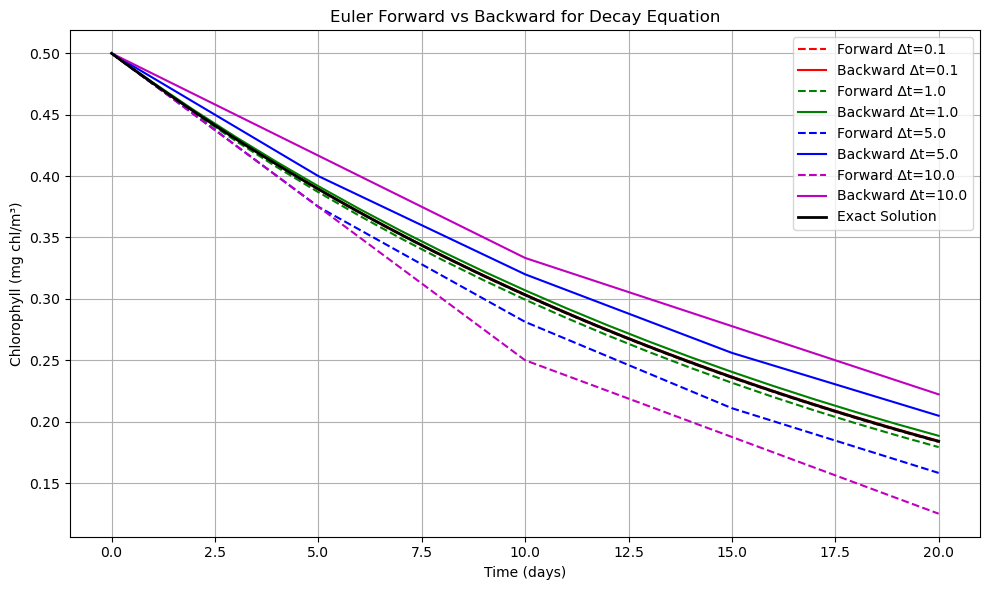

In [7]:
### The comaprison of the diffrent values
import matplotlib.pyplot as plt
import numpy as np

dt_values = [0.1, 1.0, 5.0, 10.0]
colors = ['r', 'g', 'b', 'm']

plt.figure(figsize=(10, 6))
for i, dt in enumerate(dt_values):
    t_fwd, C_fwd = euler_forward(t0, tn, dt, kappa, C0)
    t_bwd, C_bwd = euler_backward(t0, tn, dt, kappa, C0)
    t_exact = np.linspace(t0, tn, 100)
    C_exact = C0 * np.exp(-kappa * t_exact)

    plt.plot(t_fwd, C_fwd, '--', color=colors[i], label=f'Forward ∆t={dt}')
    plt.plot(t_bwd, C_bwd, '-', color=colors[i], label=f'Backward ∆t={dt}')

plt.plot(t_exact, C_exact, 'k-', label='Exact Solution', linewidth=2)
plt.xlabel("Time (days)")
plt.ylabel("Chlorophyll (mg chl/m³)")
plt.title("Euler Forward vs Backward for Decay Equation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("decay_comparison_plot.png")
plt.show()


#### Comment: Compare the results for different values of ∆t 
- What I can see is that as change in time increases more especially = 10.0, the forward Euler solution deviates greatly from the exact solution. This deviation this means that the forward solutions are not stable. As times steps increase, there will be an increase in smaller errors, and this will make it very difficult to predict concentrations for example for chlorophyll. On the other, the forward method seems to be more stable. Howvever, at a certain time step size the method can stop being reliable. In simple terms, since we are basing this on the decay equation, when you increase change in time this will make values diviate from the current decay trends. 
